## Análise Exploratória dos Dados
* Base de Dados: Air Quality Dataset
* https://www.kaggle.com/datasets/citrahsagala/airquality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirQualityUCI.csv')

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10.00.00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


# Visualização dos Dados

#### (1) `Box Plot`
* Resumo das propriedades de um conjunto de valores;
* Ex: mínimo, primeiro quartil, mediana, terceiro quartil e máximo

In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

<Axes: ylabel='T'>

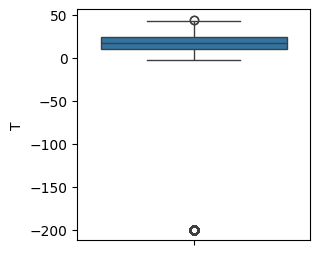

In [6]:
plt.figure(figsize=(3,3))
sns.boxplot(data = df['T'])

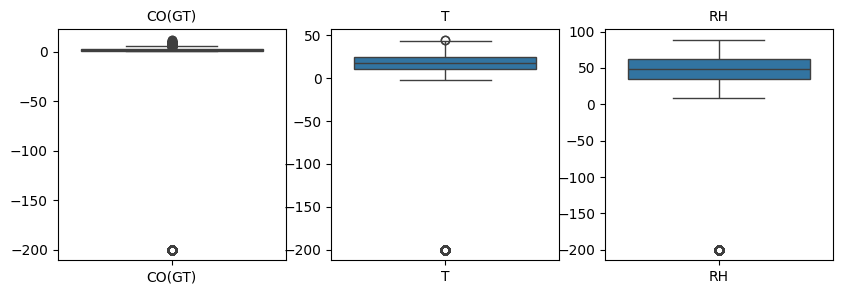

In [7]:
plt.figure(figsize=(10, 3))

def create_boxplot(feature):
    sns.boxplot(data = df[[feature]])
    plt.title(feature, fontsize = 10)

plt.subplot(1,3,1)
create_boxplot('CO(GT)')

plt.subplot(1,3,2)
create_boxplot('T')

plt.subplot(1,3,3)
create_boxplot('RH')

plt.show()

#### Tratando outliers

In [8]:
df.shape

(9357, 15)

In [9]:
df['T'].loc[df['T']<=-100].size

366

In [10]:
# Antes da substituição
print(df['T'].mean())
print(df['RH'].mean())
print(df['CO(GT)'].mean())

9.778305012290264
39.48537992946458
-34.207523778989


In [11]:
# Calcular a média sem o outlier
mediaT = df['T'].loc[df['T'] >=0].mean()
mediaCO = df['CO(GT)'].loc[df['CO(GT)']>=0].mean()
mediaRH = df['RH'].loc[df['RH'] >=0].mean()

In [12]:
mediaRH

49.2342008675342

In [13]:
# Substui o outlier pela média
# linha/coluna
df.loc[df['T']<0,'T'] = mediaT
df.loc[df['CO(GT)']<0,'CO(GT)'] = mediaCO
df.loc[df['RH']<0,'RH'] = mediaRH


In [14]:
#  Após a substituição
print(df['T'].mean())
print(df['RH'].mean())
print(df['CO(GT)'].mean())


18.345533526397862
49.23420086753419
2.1527495439145166


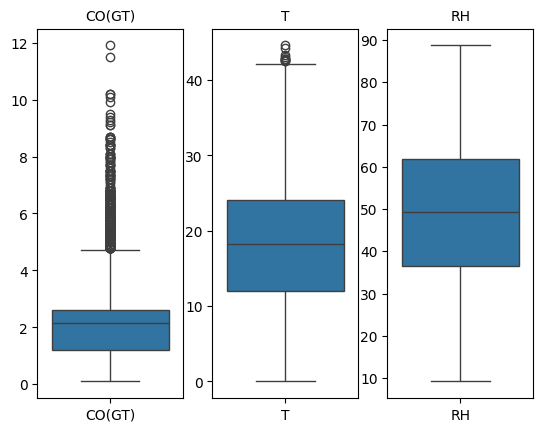

In [15]:
# Plotando novamente os gráficos

plt.subplot(1,3,1)
create_boxplot('CO(GT)')

plt.subplot(1,3,2)
create_boxplot('T')

plt.subplot(1,3,3)
create_boxplot('RH')

plt.show()

#### (2) `Violin Plot`
-  ViolinPlot combina a visualização do boxplot juntamente com um plot de densidade (similar ao que vemos nos histogramas);
- Dentro do ViolinPlot encontramos os mesmos elementos que encontramos no BoxPlot;
- Mais detalhes: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
<span style="width:80%;text-align: center;"><img align = left src="https://miro.medium.com/v2/resize:fit:1040/format:webp/1*TTMOaNG1o4PgQd-e8LurMg.png" style="height:550px;"></span>

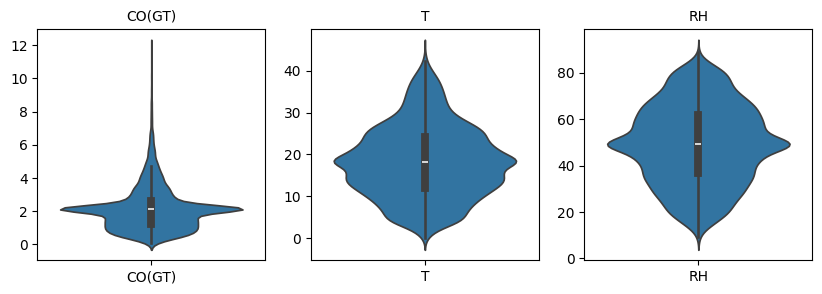

In [16]:
plt.figure(figsize=(10, 3))

def create_violinplot(feature):
    sns.violinplot(data = df[[feature]])
    plt.title(feature, fontsize = 10)

plt.subplot(1,3,1)
create_violinplot('CO(GT)')

plt.subplot(1,3,2)
create_violinplot('T')

plt.subplot(1,3,3)
create_violinplot('RH')

plt.show()

#### (3) `Heatmap`
* Avaliando correlações


In [17]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

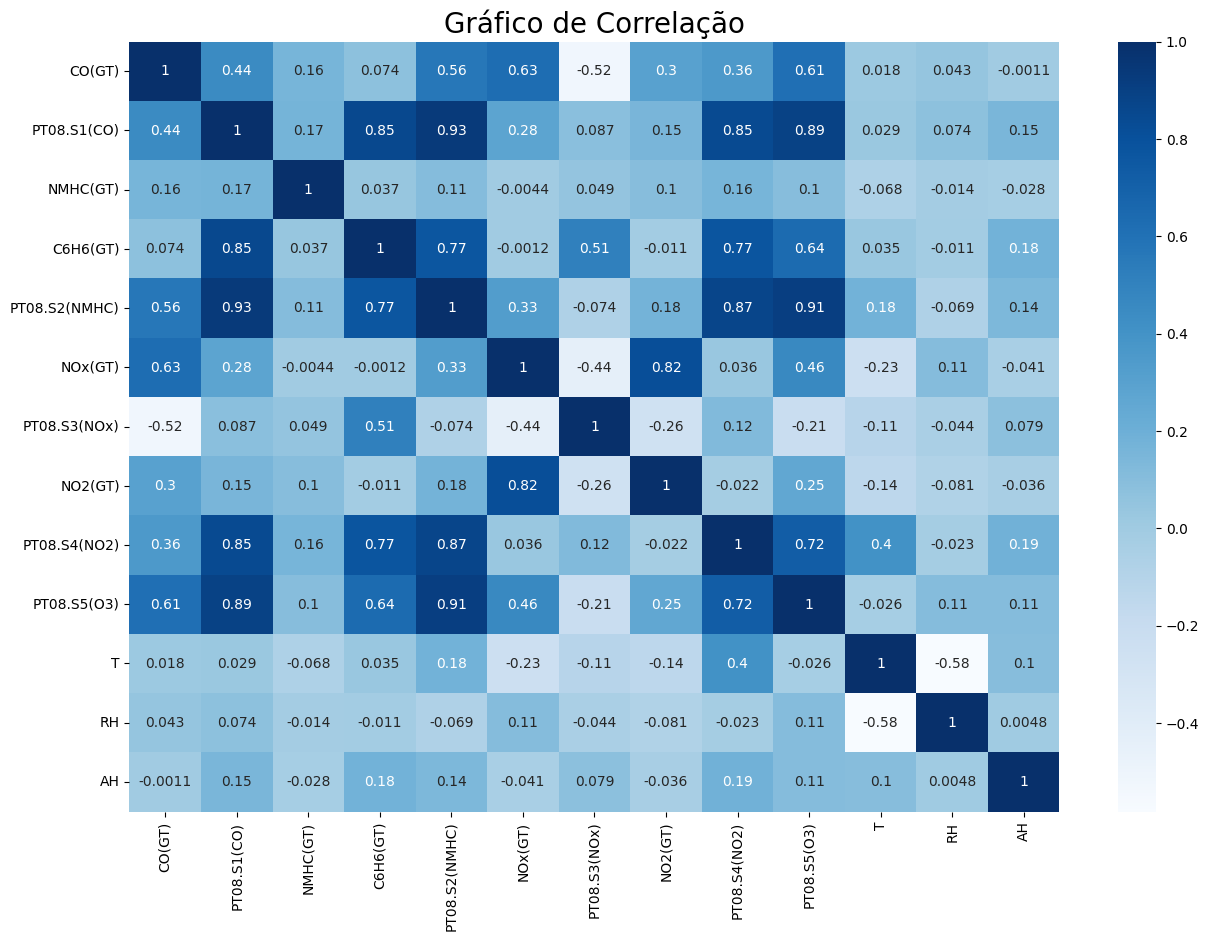

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']].corr(), cmap= 'Blues', annot= True)
plt. title("Gráfico de Correlação", size = 20)
plt.show()

#### (4) `Histplot`
* Frequência dos dados

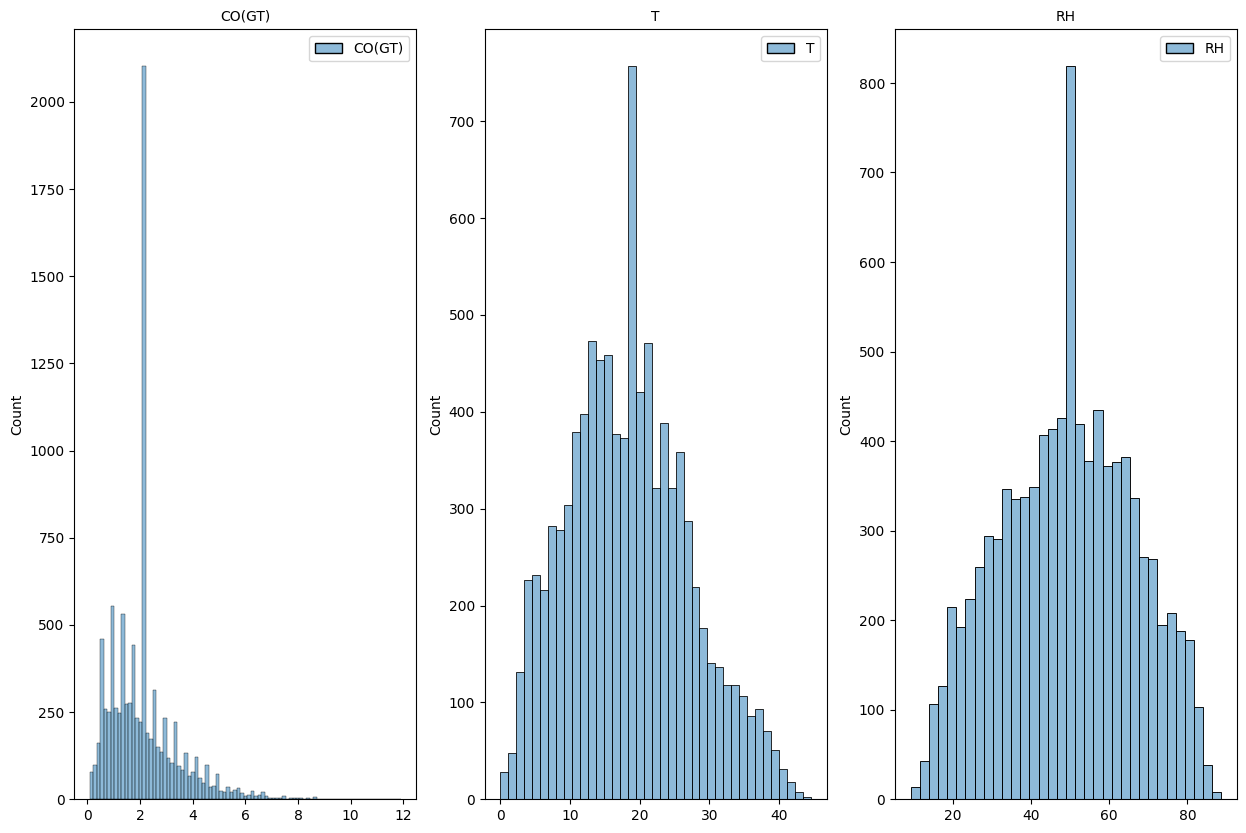

In [19]:
plt.figure(figsize=(15, 10))

def create_histogram(feature):
    sns.histplot(data = df[[feature]], kde=False)
    plt.title(feature, fontsize = 10)

plt.subplot(1,3,1)
create_histogram('CO(GT)')

plt.subplot(1,3,2)
create_histogram('T')

plt.subplot(1,3,3)
create_histogram('RH')

plt.show()


# Perguntas de interesse:
* Concentração de dióxido de Carbono (CO(GT))
* Temperatura média (T)
* Umidade Relativa (RH)

In [20]:
df = pd.read_csv('AirQualityUCI_preprocessed.csv')
df

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,month,year,day
0,2004-03-10,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,18,3,2004,10
1,2004-03-10,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,19,3,2004,10
2,2004-03-10,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,20,3,2004,10
3,2004-03-10,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,21,3,2004,10
4,2004-03-10,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,22,3,2004,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,10,4,2005,4
9353,2005-04-04,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,11,4,2005,4
9354,2005-04-04,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,12,4,2005,4
9355,2005-04-04,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,13,4,2005,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   int64  
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   int64  
 6   NOx(GT)        9357 non-null   int64  
 7   PT08.S3(NOx)   9357 non-null   int64  
 8   NO2(GT)        9357 non-null   int64  
 9   PT08.S4(NO2)   9357 non-null   int64  
 10  PT08.S5(O3)    9357 non-null   int64  
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
 14  Hour           9357 non-null   int64  
 15  month          9357 non-null   int64  
 16  year           9357 non-null   int64  
 17  day            9357 non-null   int64  
dtypes: float

In [22]:
# Concentração de CO(GT) por mês
df.groupby('month')['CO(GT)'].agg(['min','max','mean','std'])

,min,max,mean,std
month,,,,
1,0.1,8.7,2.136676,1.347566
2,0.3,8.4,2.096986,1.306472
3,0.1,8.1,2.144342,1.353374
4,0.3,7.3,2.145693,1.187923
5,0.1,6.5,1.983492,1.077254
6,0.1,6.4,1.926679,1.081146
7,0.1,5.3,1.876897,0.964013
8,0.1,3.5,1.593258,0.626322
9,0.2,7.5,2.161599,1.253465


In [23]:
# Concentração de CO(GT) por hora
df.groupby('Hour')['CO(GT)'].agg(['min','max','mean','std'])

,min,max,mean,std
Hour,,,,
0,0.1,5.9,1.843379,0.819362
1,0.1,5.6,1.585472,0.767023
2,0.1,5.5,1.288186,0.754929
3,0.1,5.2,1.141319,0.743299
4,0.1,2.8,1.512898,0.769884
5,0.1,2.9,0.982438,0.662868
6,0.1,3.5,1.142545,0.616991
7,0.1,5.7,1.871384,1.071947
8,0.1,7.3,2.703314,1.389290


In [24]:
# Temperatura por mês
df.groupby('month')['T'].agg(['min','max','mean','std'])

,min,max,mean,std
month,,,,
1,1.000000,18.345534,9.052658,4.622699
2,0.300000,19.900000,8.383870,4.839864
3,0.000000,29.300000,13.898196,5.532694
4,7.400000,31.300000,16.837335,4.796348
5,7.400000,32.800000,20.244808,5.169908
6,16.500000,42.200000,26.047403,6.077251
7,16.200000,44.600000,29.404228,6.182791
8,18.345534,40.500000,28.420069,5.690807
9,11.900000,40.700000,24.463499,5.488851


In [25]:
df.groupby('month')['RH'].agg(['min','max','mean','std'])

,min,max,mean,std
month,,,,
1,17.2,86.6,55.965170,13.913074
2,18.0,86.6,51.761308,16.276071
3,13.5,84.0,50.606806,15.689702
4,9.9,82.4,49.017749,16.214684
5,9.2,85.2,43.649434,16.687512
6,11.9,82.3,40.345972,13.940616
7,9.6,69.3,33.075987,12.713244
8,10.0,81.8,43.391097,14.213799
9,13.8,87.2,44.122938,14.961395
